In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dropout,Dense,BatchNormalization

In [2]:
import os

x_train=[]
y_train=[]
x_test=[]
y_test=[]

path_train_low='../dataSets/ref/our485/low/'
path_train_high='../dataSets/ref/our485/high/'
path_test_low='../dataSets/ref/eval15/low/'
path_test_high='../dataSets/ref/eval15/high/'

print('\nLoding Train dataset :')
i=0;
for img in os.listdir(path_train_low):
    img_low_path=os.path.join(path_train_low, img)
    img_high_path=os.path.join(path_train_high, img)
    
    img_low=load_img(img_low_path, target_size=(256, 256))
    img_low=img_to_array(img_low)/255.
    
    i=i+1
    print("{:.2f}".format(i/4.85)+' %',end='\r')
    
    img_high=load_img(img_high_path, target_size=(256,256))
    img_high=img_to_array(img_high)/255.
    
    x_train.append(img_low)
    y_train.append(img_high)
    
print('\nLoding Test dataset :')
i=0;
for img in os.listdir(path_test_low):
    img_low_path=os.path.join(path_test_low, img)
    img_high_path=os.path.join(path_test_high, img)
    
    img_low=load_img(img_low_path, target_size=(256, 256))
    img_low=img_to_array(img_low)/255.
    
    i=i+1
    print("{:.2f}".format(i/0.15)+' %',end='\r')
    
    img_high=load_img(img_high_path, target_size=(256, 256))
    img_high=img_to_array(img_high)/255.
    
    x_test.append(img_low)
    y_test.append(img_high)

x_train=np.array(x_train, dtype="float32")
y_train=np.array(y_train, dtype="float32")

x_test=np.array(x_test, dtype="float32")
y_test=np.array(y_test, dtype="float32")


Loding Train dataset :
100.00 %
Loding Test dataset :


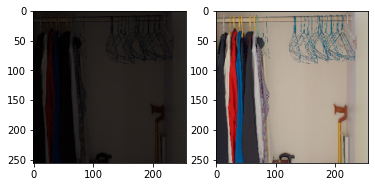

In [3]:
fig=plt.figure()

f=fig.add_subplot(1,2,1)
s=fig.add_subplot(1,2,2)

f.imshow(x_test[2])
s.imshow(y_test[2])

In [4]:
model=Sequential()

model.add(Conv2D(81,(5,5),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(27,(3,3),padding='same',activation='elu'))
model.add(Conv2D(27,(3,3),padding='same',activation='elu'))
model.add(Conv2D(3,(1,1),padding='same',activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 81)      6156      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 27)      19710     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 27)      6588      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 256, 3)       84        
Total params: 32,538
Trainable params: 32,538
Non-trainable params: 0
_________________________________________________________________


In [5]:
x_train.shape

(485, 256, 256, 3)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint=ModelCheckpoint('models/ref/ref_cnn.h5',
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose=1
                          )
earlystop=EarlyStopping(monitor='val_loss',
                        patience=5,
                        min_delta=0,
                        restore_best_weights=True,
                        verbose=1
                       )
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                            factor=0.2,
                            patience=5,
                            min_delta=0.0001,
                            verbose=1
                           )
callbacks=[checkpoint,earlystop,reduce_lr]

model.compile(loss=keras.losses.MeanSquaredError(),#MeanAbsoluteError
              optimizer='adam',
              metrics=['accuracy']
             )

history=model.fit(
    x=x_train,
    y=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=callbacks
    )

Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.4054 
Epoch 00001: val_loss improved from inf to 0.03477, saving model to models/ref\ref_cnn.h5
16/16 [==============================] - 249s 16s/step - loss: 0.0439 - accuracy: 0.4054 - val_loss: 0.0348 - val_accuracy: 0.4887
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.5772 
Epoch 00002: val_loss improved from 0.03477 to 0.02958, saving model to models/ref\ref_cnn.h5
16/16 [==============================] - 247s 15s/step - loss: 0.0331 - accuracy: 0.5772 - val_loss: 0.0296 - val_accuracy: 0.5883
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 0.0297 - accuracy: 0.6365 
Epoch 00003: val_loss improved from 0.02958 to 0.02692, saving model to models/ref\ref_cnn.h5
16/16 [==============================] - 229s 14s/step - loss: 0.0297 - accuracy: 0.6365 - val_loss: 0.0269 - val_accuracy: 0.6371
Epoch 4/20
16/16 [==========================

In [1]:
plt.grid()

plt.plot(history.history['loss'],'--^r',label="loss")
plt.plot(history.history['accuracy'],'--^g',label='accuracy')
plt.plot(history.history['val_loss'],'-or',label='val_loss')
plt.plot(history.history['val_accuracy'],'-og',label='val_accuracy')
plt.legend()

NameError: name 'plt' is not defined

In [ ]:
fig=plt.figure()

def check_result(n):
    fig.add_subplot(1,2,1).imshow(y_test[n])
    fig.add_subplot(1,2,2).imshow(model.predict(x_test)[n])

check_result(12)